In [1]:
!pip install matplotlib
!pip install opencv-python
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd 
import os 
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.applications.densenet import DenseNet121
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import cv2

In [3]:
import pathlib

path = "C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\"
dataset_path = pathlib.Path(path)
dirs_name = os.listdir(dataset_path)
dirs_name

['images', 'image_embeddings.csv', 'myntradataset', 'styles.csv']

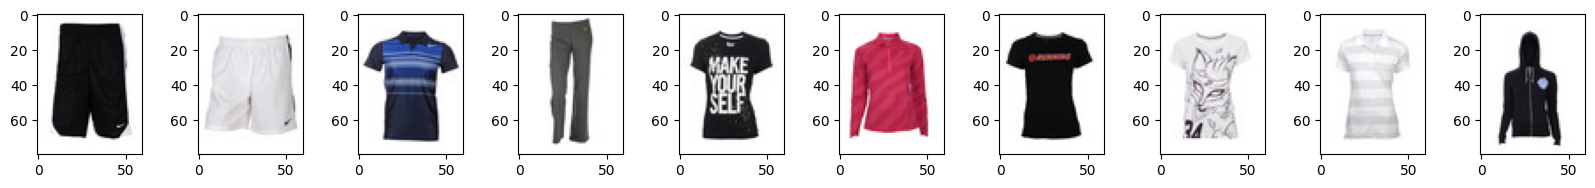

In [4]:
plt.figure(figsize=(20, 20))
for i in range (20, 30):
  plt.subplot(6, 10, i-10+1)
  cloth_img = mpimg.imread(path + 'images/100' + str(i) + '.jpg')
  plt.imshow(cloth_img)
plt.subplots_adjust(wspace=0.5, hspace=1)
plt.show()


In [5]:
styles_df = pd.read_csv(path + "styles.csv", nrows = 6000, on_bad_lines='skip')
styles_df['image'] = styles_df.apply(lambda x: str(x['id']) + ".jpg", axis = 1)
print(styles_df.shape)
styles_df.head(10)

(6000, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


<Axes: ylabel='articleType'>

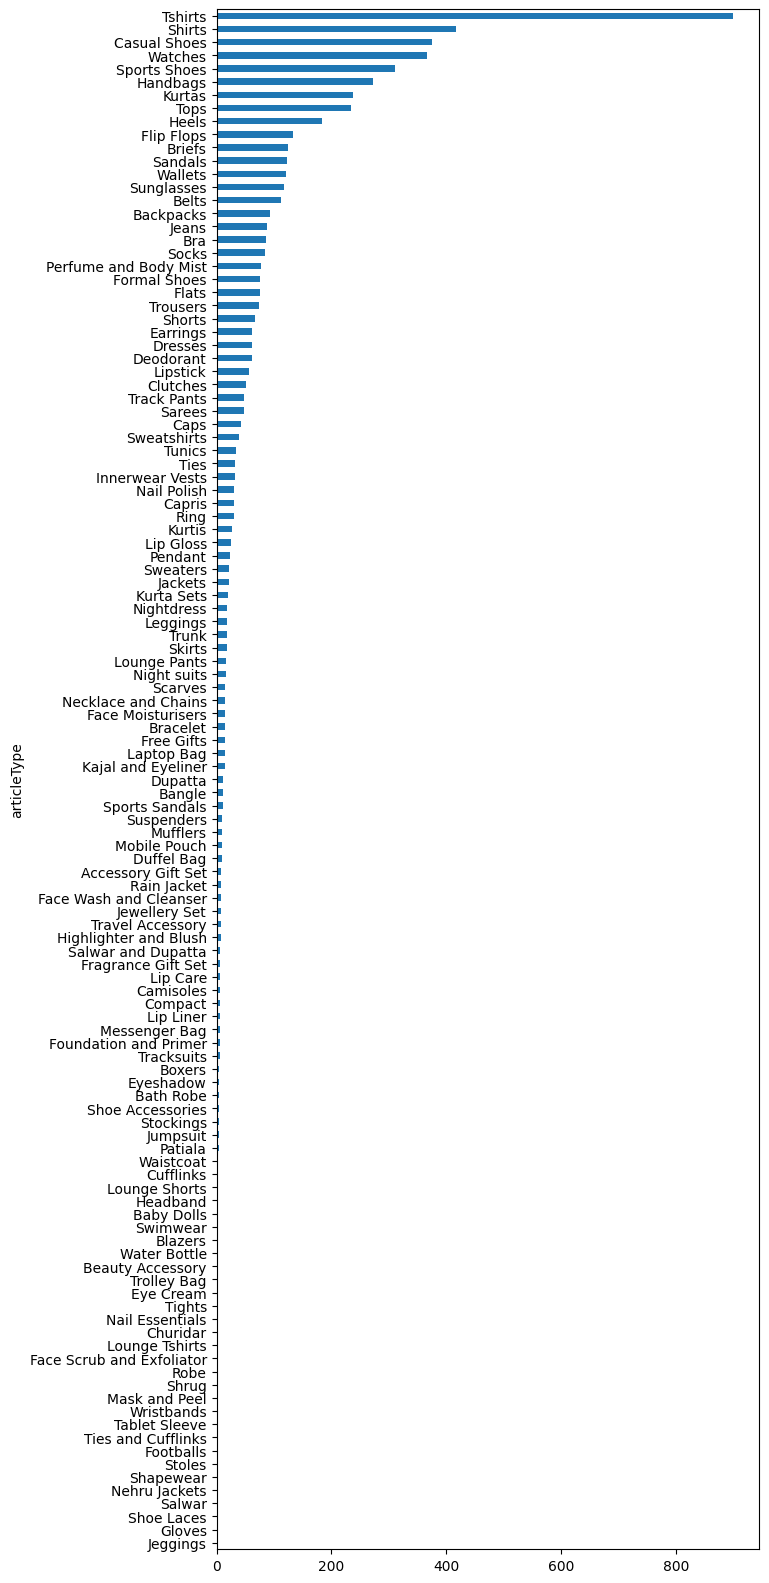

In [6]:
plt.figure(figsize=(7, 20))
styles_df.articleType.value_counts().sort_values().plot(kind='barh')

In [7]:
img_width, img_height, chnls = 100, 100, 3

In [8]:
!pip install h5py
!pip install --upgrade tensorflow


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalMaxPooling2D, Input
from tensorflow.keras.models import Model

img_width, img_height, chnls = 224, 224, 3

vgg16_base = VGG16(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnls))

vgg16_base.trainable = False

input_layer = Input(shape=(img_width, img_height, chnls))
x = vgg16_base(input_layer)
x = GlobalMaxPooling2D()(x)
vgg16_model = Model(inputs=input_layer, outputs=x)

print(vgg16_model.summary()) 


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


In [11]:
def predict(model, img_path):
    processed_image = preprocess_image(img_path)
    print(f"Processed image shape: {processed_image.shape}")  # Debugging output
    embeddings = model.predict(processed_image)
    return embeddings.squeeze()

# Example usage
test_image_path = 'C:/Users/aksha/OneDrive/Desktop/fd/images/1163.jpg'
print(predict(vgg16_model, test_image_path))


Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
[ 37.864635     0.           0.          46.66769      5.5890584
  19.571442    47.110783    36.621223     0.           0.
   9.88715      7.5525656    3.1560133    0.          76.27313
  22.264517     0.           0.          16.488152    21.994375
   0.          11.541823    56.61548     17.03337      0.
   0.6054035   18.445341    12.614145     9.460461    66.65433
  14.145403     0.          53.113        0.           5.014111
  63.107773     0.          26.86288     11.44127     16.861078
  20.068188   187.4721      42.22361     46.58854     43.628525
  57.102398    30.878801    70.19782     54.48055     25.518486
  44.26951     78.0214     140.13286     71.337585    39.008354
   3.4083576    4.4948797   41.311672     0.          35.495186
   0.           0.          79.08787     54.42675      0.
  26.252378    31.063574    10.048066     0.          16.758606
   0.          22.521334    81.83642     68.

In [ ]:
'''import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    device_name = '/GPU:0'
else:
    device_name = '/CPU:0'

print(f"Using device: {device_name}")

# Load the CSV file and skip bad lines
styles_df = pd.read_csv('C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\styles.csv', on_bad_lines='skip')

# Add a column for image paths based on the 'id' column
styles_df['image'] = styles_df['id'].apply(lambda x: f'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\{x}.jpg')

# Display the dataframe to check if it loaded correctly
print(styles_df.head())

# Load the VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return preprocess_input(img_array)
    except FileNotFoundError as e:
        print(f"File not found: {img_path}")
        return None

# Function to get embeddings for a batch of images
def predict_batch(model, img_paths):
    images = []
    for img_path in img_paths:
        processed_image = preprocess_image(img_path)
        if processed_image is not None:
            images.append(processed_image)
    
    if not images:
        return np.array([])  # Return an empty array if no images

    images = np.vstack(images)
    
    with tf.device(device_name):
        embeddings = model.predict(images)
    
    return embeddings

# Function to get embeddings for all images in batches
def get_embeddings(df, model, batch_size=32):
    img_paths = df['image'].tolist()
    all_embeddings = []
    
    for i in range(0, len(img_paths), batch_size):
        batch_paths = img_paths[i:i + batch_size]
        batch_embeddings = predict_batch(model, batch_paths)
        if batch_embeddings.size > 0:
            all_embeddings.append(batch_embeddings)
    
    if not all_embeddings:
        return pd.DataFrame()  # Return an empty DataFrame if no embeddings
    
    # Concatenate all embeddings
    all_embeddings = np.vstack(all_embeddings)
    
    # Convert to DataFrame
    df_embeddings = pd.DataFrame(all_embeddings)
    
    return df_embeddings

# Generate embeddings
df_embeddings = get_embeddings(styles_df, vgg16_model)

# Save embeddings to a CSV file
df_embeddings.to_csv('C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv', index=False)
'''

In [12]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    device_name = '/GPU:0'
else:
    device_name = '/CPU:0'

print(f"Using device: {device_name}")

styles_df = pd.read_csv('C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\styles.csv', on_bad_lines='skip')

styles_df['image'] = styles_df['id'].apply(lambda x: f'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\{x}.jpg')

print(styles_df.head())

vgg16_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def preprocess_image(img_path, target_size=(224, 224)):
    try:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        return preprocess_input(img_array)
    except FileNotFoundError as e:
        print(f"File not found: {img_path}")
        return None

def predict_batch(model, img_paths):
    images = []
    for img_path in img_paths:
        processed_image = preprocess_image(img_path)
        if processed_image is not None:
            images.append(processed_image)
    
    if not images:
        return np.array([]) 

    images = np.vstack(images)
    
    with tf.device(device_name):
        embeddings = model.predict(images)
    
    return embeddings

def get_embeddings(df, model, batch_size=32):
    img_paths = df['image'].tolist()
    all_embeddings = []
    
    for i in range(0, len(img_paths), batch_size):
        batch_paths = img_paths[i:i + batch_size]
        batch_embeddings = predict_batch(model, batch_paths)
        if batch_embeddings.size > 0:
            all_embeddings.append(batch_embeddings)
    
    if not all_embeddings:
        return pd.DataFrame() 
    
    all_embeddings = np.vstack(all_embeddings)
    
    df_embeddings = pd.DataFrame(all_embeddings)
    
    return df_embeddings

Using device: /CPU:0
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt   
1  2012.0  Casual             Peter England Men Party Blue Jeans   
2  2016.0  Casual                       Titan Women Silver Watch   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants   
4  2012.0  Casual                          Puma Men Grey T-shirt   

                                               image  
0  C:\Users\aksha\OneDrive\Desktop\fd\images\1

In [13]:
import pandas as pd

df = pd.read_csv('C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv')

print(df.head(5))


          0         1         2          3         4         5         6  \
0  1.019203  0.000000  2.451241   0.000000  0.533343  0.107463  0.486466   
1  0.000000  0.000000  0.397452   0.000000  1.233235  1.172162  0.467565   
2  9.530018  0.003045  0.000000  11.431204  0.000000  0.166055  2.554164   
3  0.101240  0.453711  0.000000   0.000000  1.245155  1.172352  1.835462   
4  0.257862  0.000000  0.035850   0.000000  2.202048  0.811751  1.281546   

          7         8         9  ...       502        503       504       505  \
0  0.000000  1.502644  0.000000  ...  0.000000   1.269699  0.000000  0.223533   
1  0.287565  1.402636  0.000000  ...  0.000000  10.421809  0.000000  0.441806   
2  0.000000  0.127478  0.810726  ...  0.001723   0.000000  0.035127  0.000000   
3  0.197131  0.715152  0.000000  ...  0.000000  14.210214  0.000000  0.320910   
4  0.690533  1.268274  0.000000  ...  0.000000   7.488741  0.000000  0.078159   

        506       507        508       509       510    

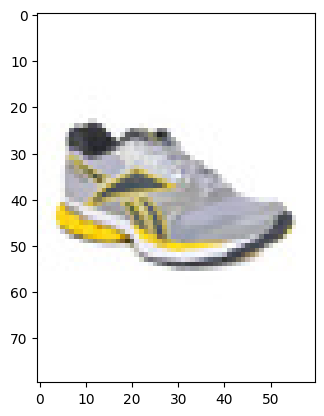

In [14]:
import matplotlib.pyplot as plt
url = "C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\10037.jpg"
a = plt.imread(url)
plt.imshow(a)

In [15]:
sample_image = predict(vgg16_model, 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\10037.jpg')
sample_image.shape

Processed image shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


(512,)

In [16]:
df_sample_image = pd.DataFrame(sample_image)
print(df_sample_image)

            0
0    0.591384
1    0.629958
2    0.268913
3    5.388254
4    0.654677
..        ...
507  0.197203
508  3.810116
509  0.253983
510  2.954370
511  0.000000

[512 rows x 1 columns]


In [17]:
!pip install --upgrade scikit-learn


In [18]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\aksha\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex


In [19]:
!pip install scikit-learn


In [20]:
import sys
print(sys.path)


['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\aksha\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', 'C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod', '', 'C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod\\lib\\site-packages', 'C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod\\lib\\site-packages\\win32', 'C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod\\lib\\site-packages\\win32\\lib', 'C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod\\lib\\site-packages\\Pythonwin']


In [21]:
!pip uninstall scikit-learn -y
!pip install scikit-learn


Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)


In [22]:
import sys
print(sys.executable)


C:\Users\aksha\TF Object Detection\TFODCourse\tfod\Scripts\python.exe


In [23]:
!pip install --user scikit-learn


In [24]:
%pip install scikit-learn


In [25]:
!pip3 install scikit-learn


In [26]:
import site
print(site.getsitepackages())


['C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod', 'C:\\Users\\aksha\\TF Object Detection\\TFODCourse\\tfod\\lib\\site-packages']


In [27]:
import sklearn

print(sklearn.__version__)


1.5.1


In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import linear_kernel

df_embeddings = pd.DataFrame(np.random.rand(10, 4096), columns=[f"feature_{i}" for i in range(4096)])
df_sample_image = pd.DataFrame(np.random.rand(1, 4096), columns=[f"feature_{i}" for i in range(4096)])

sample_similarity = linear_kernel(df_sample_image, df_embeddings)

print("Sample Similarity:\n", sample_similarity)

Sample Similarity:
 [[1043.94282189 1035.56803446 1013.89317084 1040.36118467 1029.60960003
  1020.68758004 1031.87808475 1020.77350199 1022.16698279 1027.28810069]]


In [29]:
def get_similarity(model):
  sample_image = predict(vgg16_model, '10037.jpg')
  df_sample_image = pd.DataFrame(sample_image)
  sample_similarity = linear_kernel(df_sample_image, df_embeddings)
  return sample_similarity

In [30]:
def normalize_sim(similarity):
  x_min = similarity.min(axis = 1)
  x_max = similarity.max(axis = 1)
  norm = (similarity-x_min)/(x_max-x_min)[:, np.newaxis]
  return norm

sample_similarity_norm = normalize_sim(sample_similarity)
sample_similarity_norm.shape

(1, 10)

In [31]:
def get_recommendations(df, similarity):
  sim_scores = list(enumerate(similarity[0]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse = True)
  sim_scores = sim_scores[0:5]
  print(sim_scores)
  cloth_indices = [i[0] for i in sim_scores]
  return df['image'].iloc[cloth_indices]

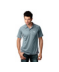

In [38]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
for i in recommendation_list:
    full_path = os.path.join(path, i)
    try:
        cloth_img = mpimg.imread(full_path)
        plt.subplot(6, 10, j+1)
        plt.imshow(cloth_img)
        plt.axis("off")
    except FileNotFoundError:
        print(f"File not found: {full_path}")


[(0, 1.0), (3, 0.8808093572016127), (1, 0.721301674339805), (6, 0.5985065809819917), (4, 0.5230153641379818)]


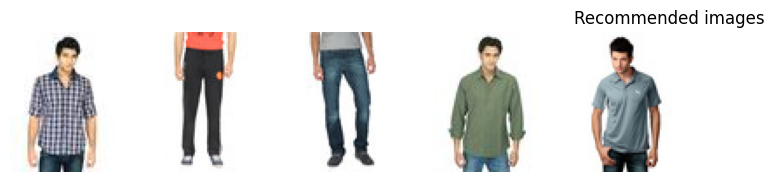

In [39]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'

recommendation = get_recommendations(styles_df, sample_similarity_norm)
recommendation_list = recommendation.to_list()

plt.figure(figsize=(20, 20))
j = 0
for i in recommendation_list:
    full_path = os.path.join(path, i)  # Construct the full path
    try:
        cloth_img = mpimg.imread(full_path)
        plt.subplot(6, 10, j + 1)
        plt.imshow(cloth_img)
        plt.axis("off")
        j += 1
    except FileNotFoundError:
        print(f"File not found: {full_path}")

plt.title("Recommended images", loc='left')
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()


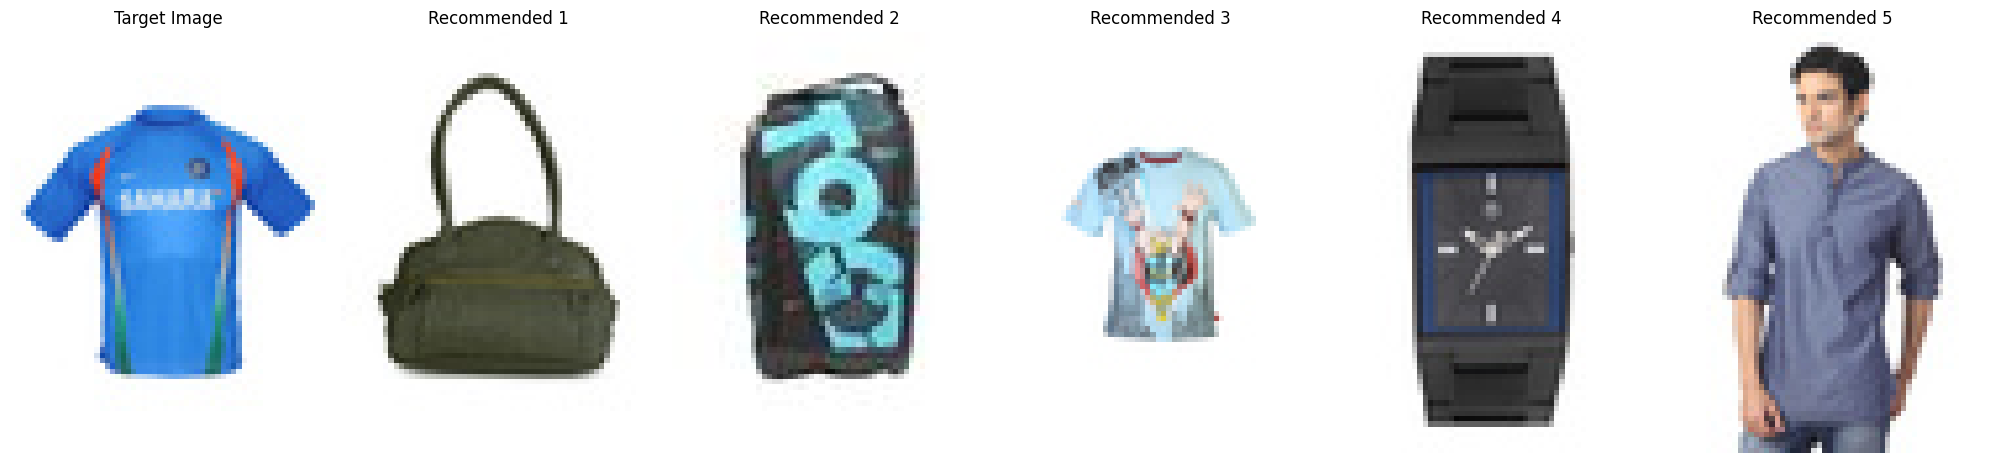

In [2]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '1163.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename) 

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


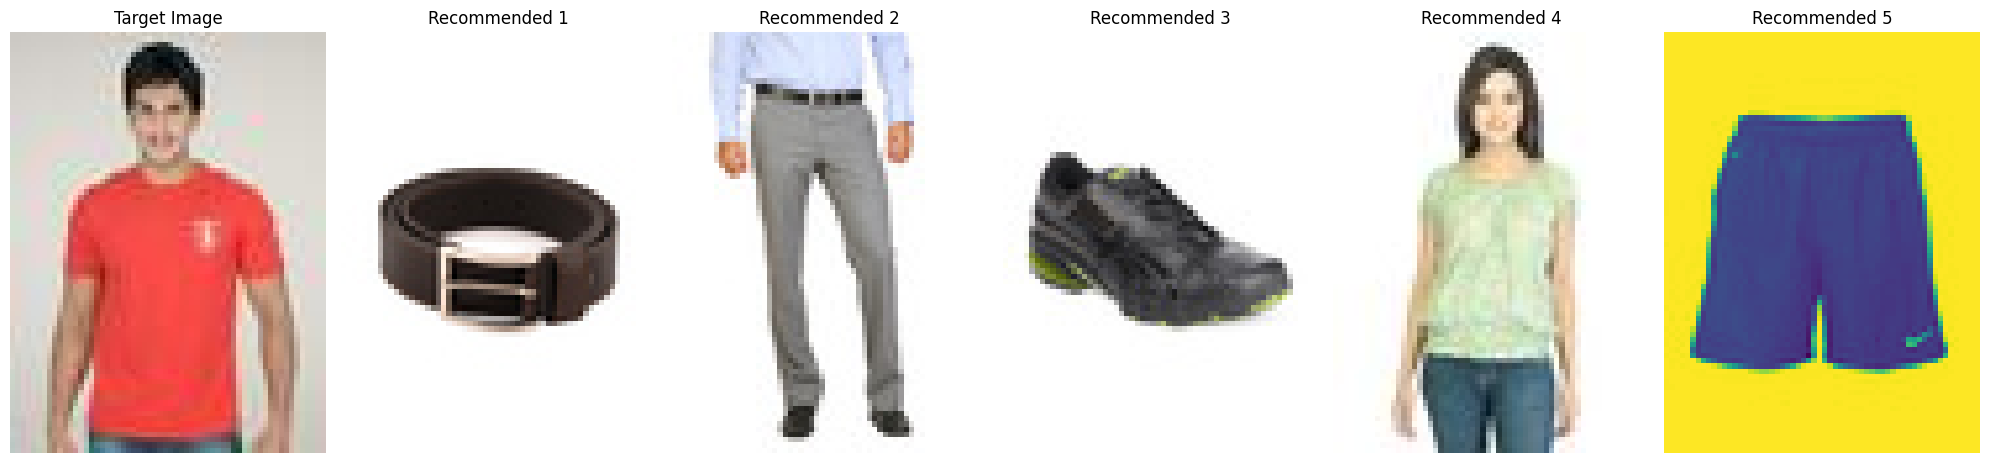

In [4]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '1529.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename)  

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


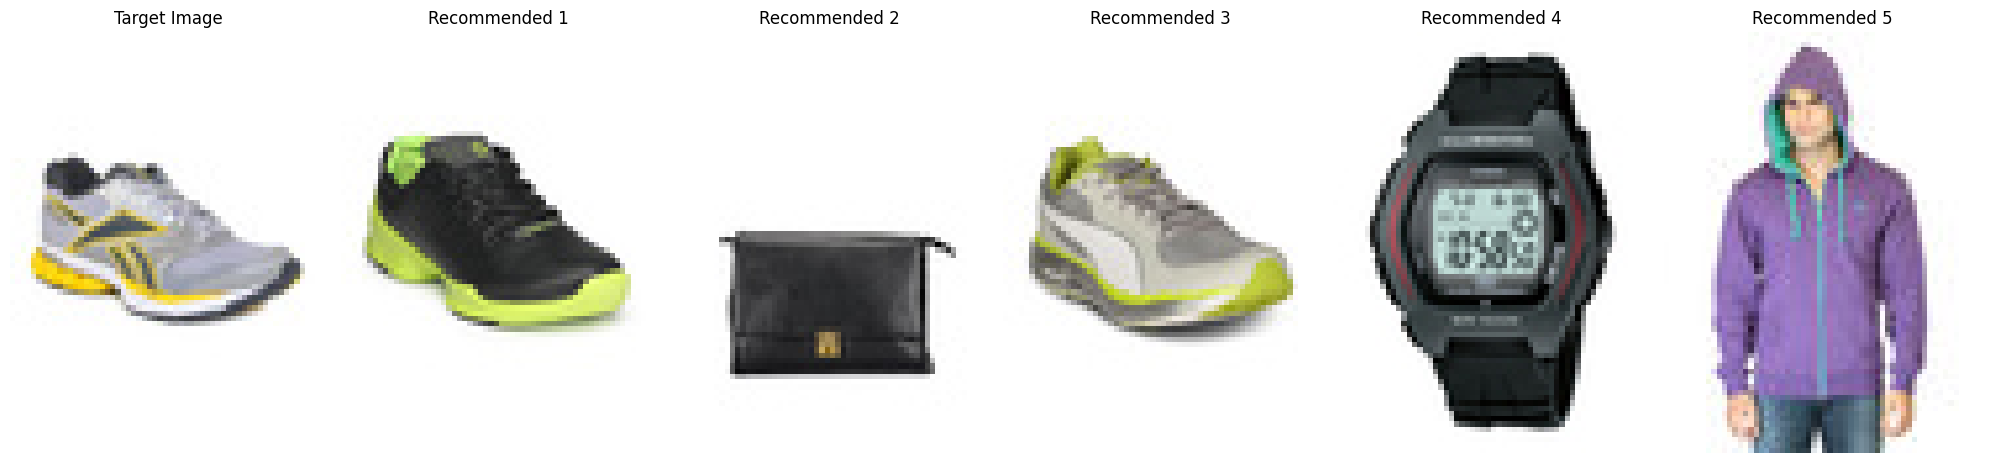

In [5]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '10037.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename)  

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


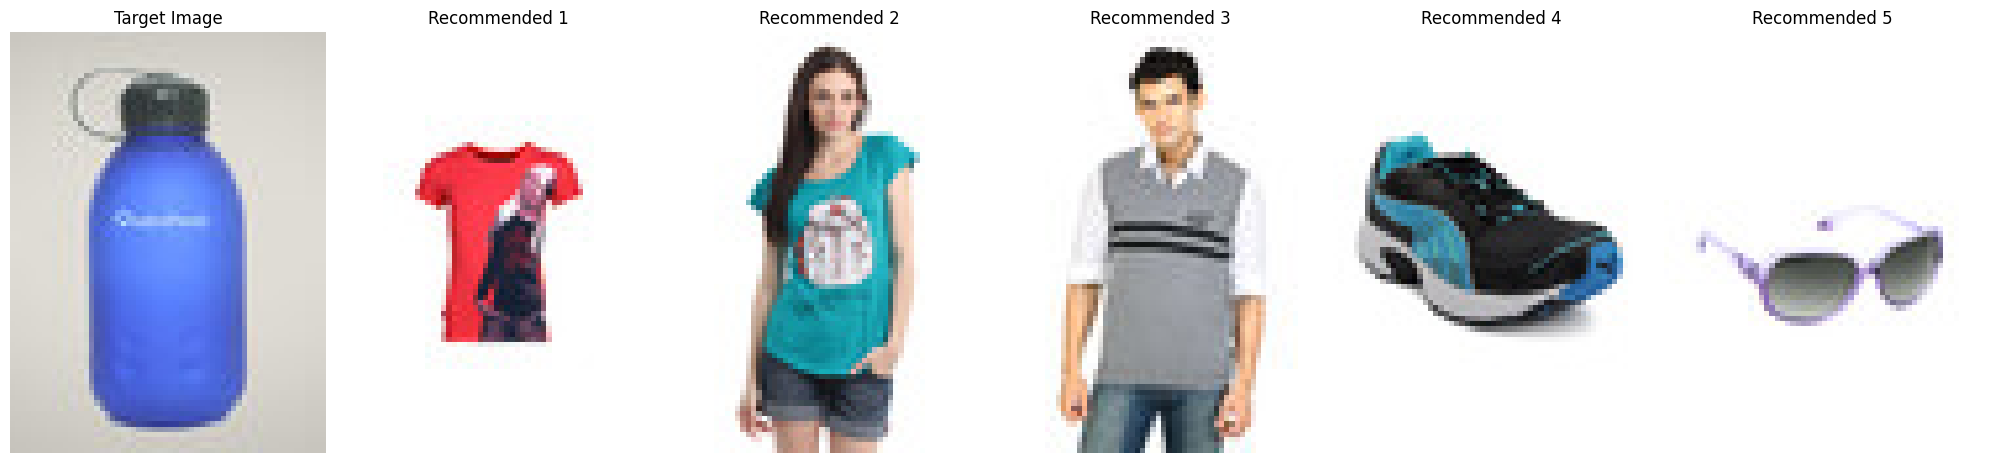

In [6]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '1554.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename)  

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


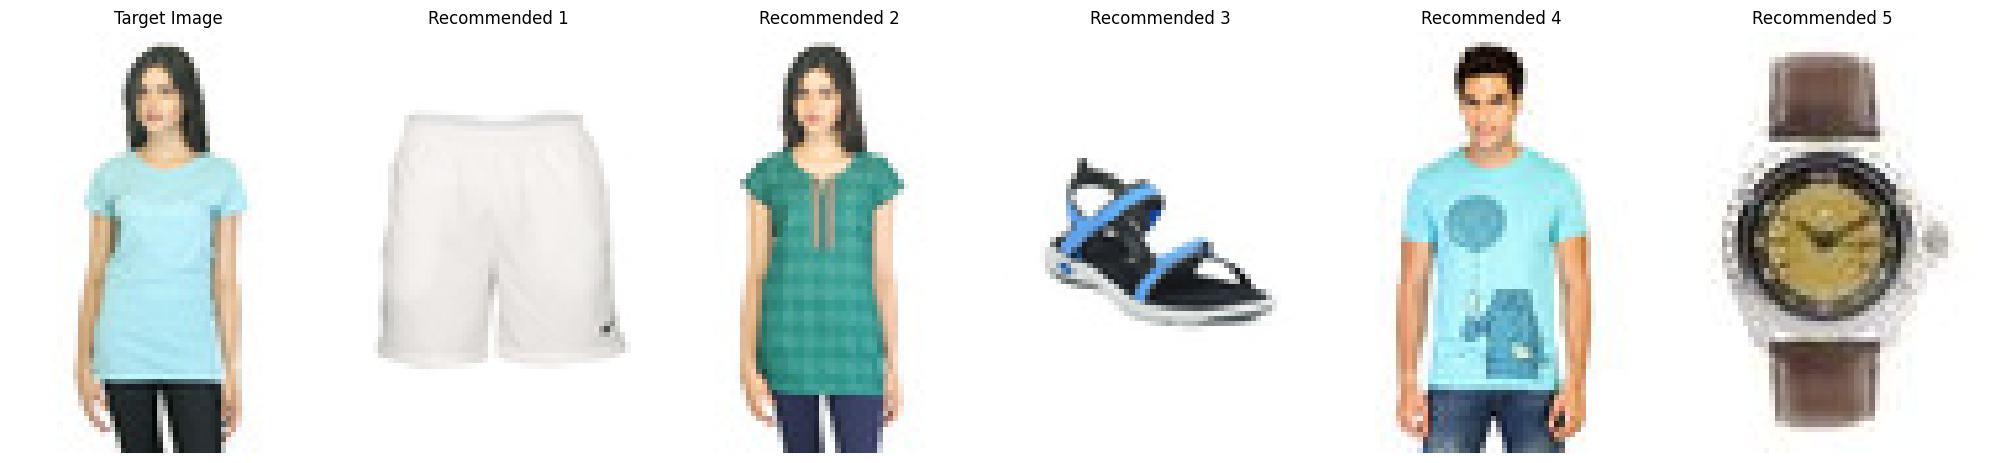

In [7]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '29169.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename) 

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


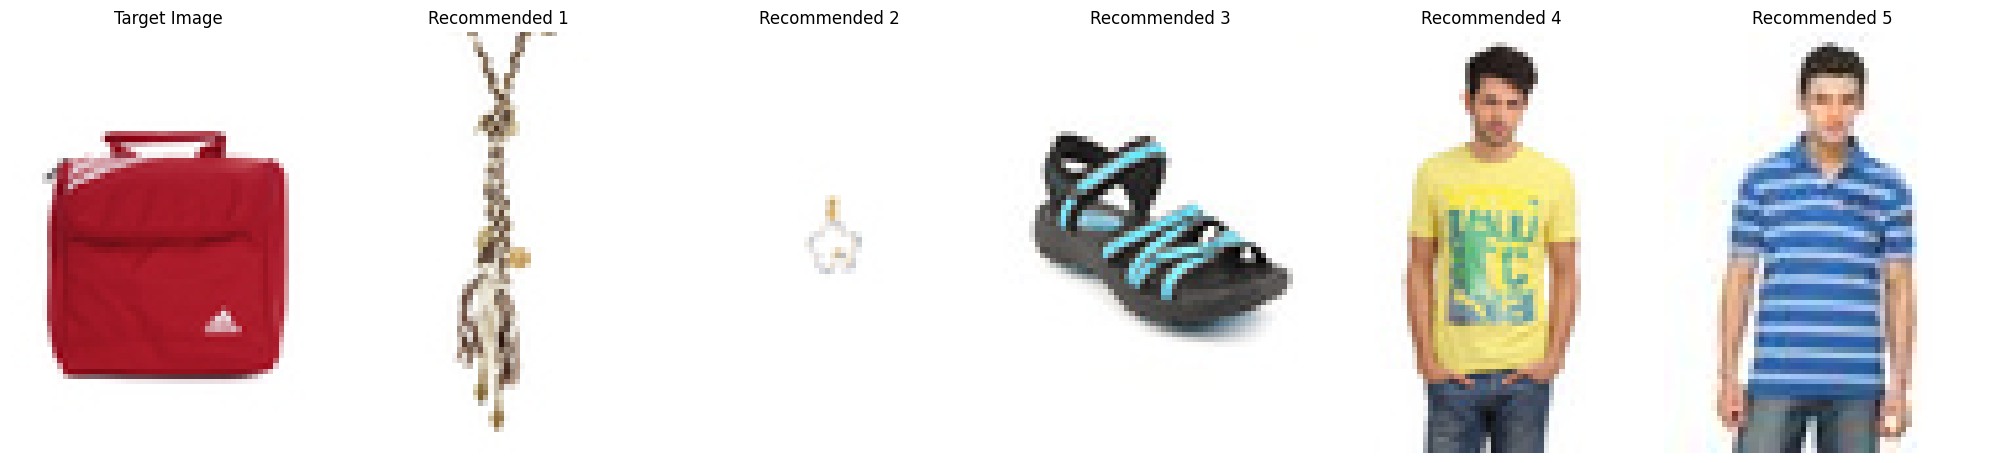

In [8]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '34464.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename)  

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


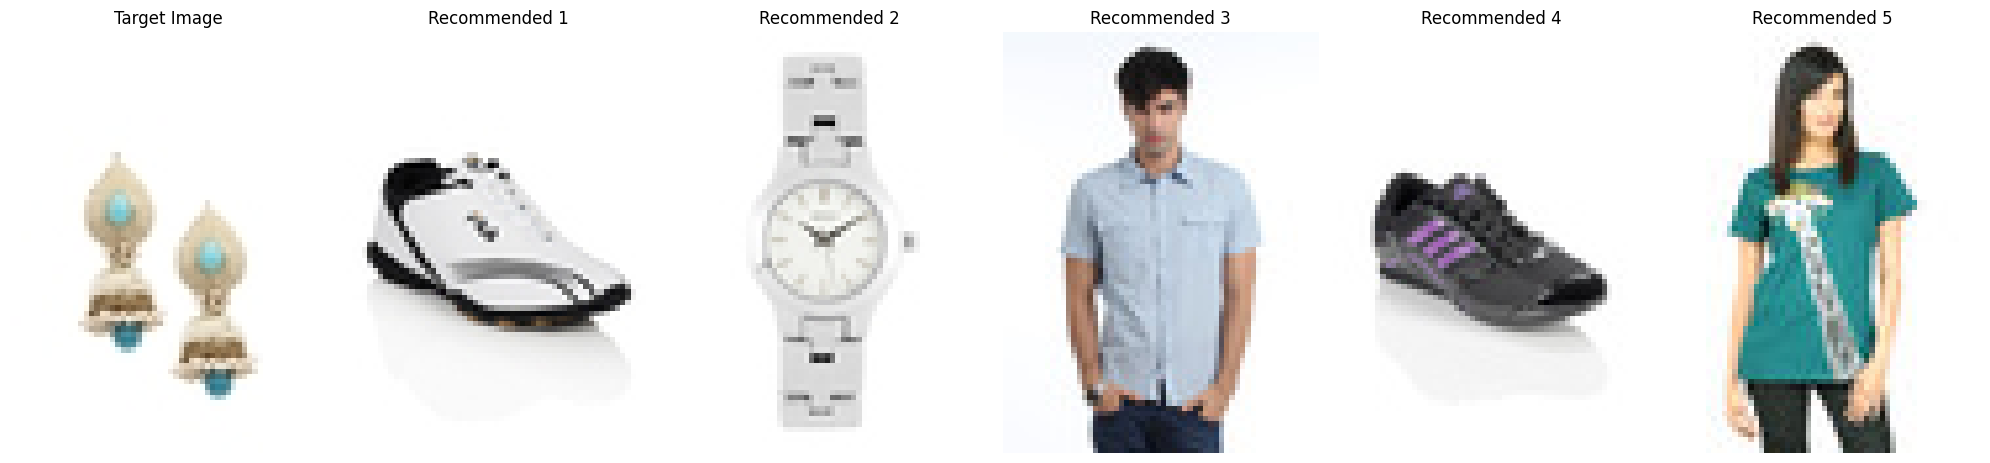

In [9]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '43815.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename)  

if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1]  
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()


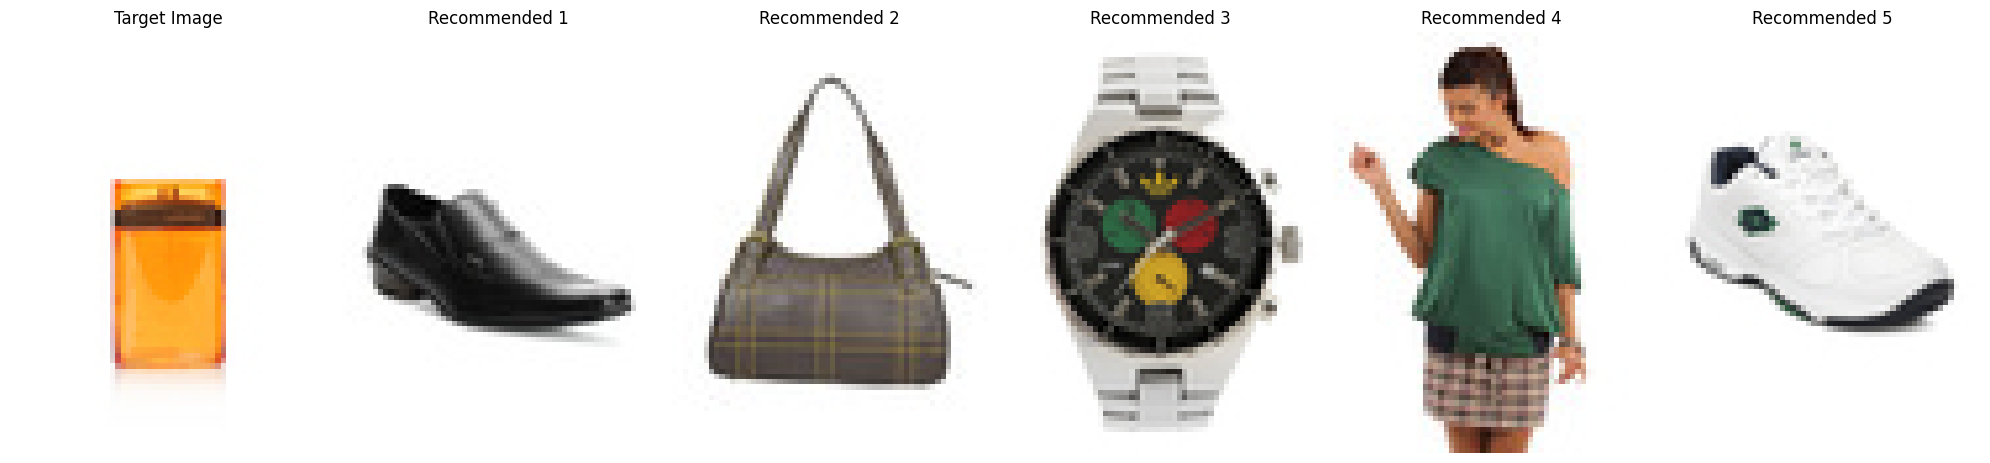

In [10]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

images_path = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\images\\'
embeddings_file = 'C:\\Users\\aksha\\OneDrive\\Desktop\\fd\\image_embeddings.csv'
target_image_name = '43986.jpg'

embeddings_df = pd.read_csv(embeddings_file, header=None)

embeddings = embeddings_df.values.astype(float)

image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

image_file_dict = {os.path.splitext(f)[0]: f for f in image_files}

target_image_basename = os.path.splitext(target_image_name)[0]
if target_image_basename not in image_file_dict:
    raise ValueError(f"Image {target_image_name} not found in the images directory")

target_embedding_index = int(target_image_basename)  
if target_embedding_index >= len(embeddings):
    raise ValueError(f"Embedding for {target_image_name} not found in the embeddings file")

target_embedding = embeddings[target_embedding_index]

similarities = cosine_similarity([target_embedding], embeddings).flatten()

top_recommendations_indices = np.argsort(similarities)[-6:-1] 
top_recommendations = [image_files[i] for i in top_recommendations_indices]

plt.figure(figsize=(20, 20))
num_images = len(top_recommendations) + 1

plt.subplot(1, num_images, 1)
target_img_path = os.path.join(images_path, target_image_name)
if os.path.exists(target_img_path):
    target_img = mpimg.imread(target_img_path)
    plt.imshow(target_img)
    plt.title('Target Image')
    plt.axis('off')
else:
    print(f"Target image file {target_image_name} not found.")

for j, image_name in enumerate(top_recommendations):
    plt.subplot(1, num_images, j + 2)
    img_path = os.path.join(images_path, image_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f'Recommended {j + 1}')
        plt.axis('off')
    else:
        print(f"Recommended image file {image_name} not found.")

plt.tight_layout()
plt.show()
